### Линейно разделимая выборка

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_gaussian_quantiles

In [2]:
# Construct dataset
X1, y1 = make_gaussian_quantiles(mean=(10, 1), cov=5.,
                                 n_samples=200, n_features=2,
                                 n_classes=1, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(-10, 1), cov=5.,
                                 n_samples=200, n_features=2,
                                 n_classes=1, random_state=1)

In [3]:
X = np.concatenate((X1, X2))
y = np.concatenate((y1, y2 + 1))

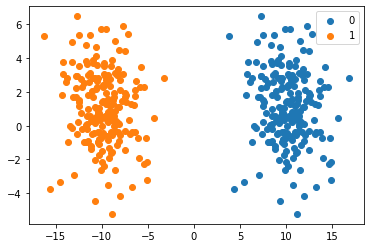

In [5]:
feats = X
target = y

f, ax = plt.subplots(1)
for i in np.unique(target):
    mask = target == i
    plt.scatter(feats[mask, 0], feats[mask, 1], label=i)
ax.legend();

In [6]:
from sklearn import svm

clf = svm.SVC(kernel = 'linear')

clf.fit(X, y) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [7]:
y_pred = clf.predict(X)

In [8]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,y_pred))

1.0


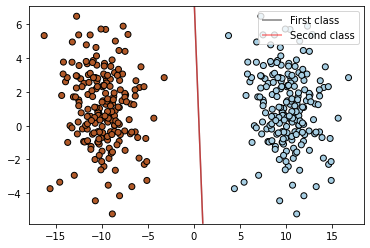

In [9]:
def plot_the_samples(X,y, model_):
# plot the samples
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')
# plot the decision functions for both classifiers
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

# create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

# get the separating hyperplane
    Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
    a = ax.contour(XX, YY, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# get the separating hyperplane for weighted classes
    Z = model_.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins for weighted classes
    b = ax.contour(XX, YY, Z, colors='r', levels=[0], alpha=0.5, linestyles=['-'])

    plt.legend([a.collections[0], b.collections[0]], ["First class", "Second class"],
           loc="upper right")
    plt.show()
plot_the_samples(X,y,clf)

### Линейно неразделимая выборка

In [10]:
import math
import random

r_squared = [random.uniform(0, 1) for i in range(200)]
theta = [2*math.pi*random.random() for i in range(200)]

In [11]:
x =[math.sqrt(r_squared[i])*math.cos(theta[i]) for i in range(200)] 
y =[math.sqrt(r_squared[i])*math.sin(theta[i]) for i in range(200)]

In [12]:
X_cycle = np.array([np.array([x[i],y[i]]) for i in range(200)] )

In [13]:
X_cycle.shape

(200, 2)

In [14]:
r_notsquared = [random.uniform(1, 2) for i in range(200)]
theta = [2*math.pi*random.random() for i in range(200)]

In [15]:
x =[math.sqrt(r_notsquared[i])*math.cos(theta[i]) for i in range(200)] 
y =[math.sqrt(r_notsquared[i])*math.sin(theta[i]) for i in range(200)]

In [16]:
X_notcycle = np.array([np.array([x[i],y[i]]) for i in range(200)] )

In [17]:
X_full = np.concatenate((X_cycle , X_notcycle), axis=0 )
y = np.concatenate((np.zeros(200),np.zeros(200) + 1))

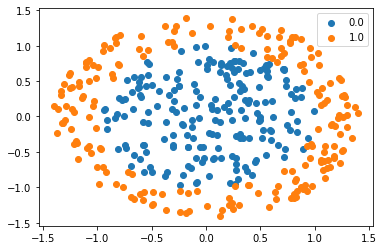

In [18]:
feats = X_full
target = y

f, ax = plt.subplots(1)
for i in np.unique(target):
    mask = target == i
    plt.scatter(feats[mask, 0], feats[mask, 1], label=i)
ax.legend()

In [19]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_full, y) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

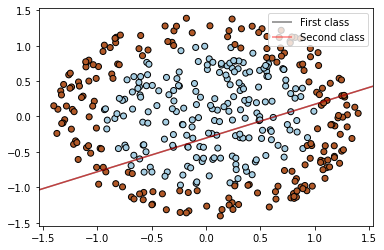

In [20]:
plot_the_samples(X_full,y,clf)

In [21]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
model1 = svm.SVC(kernel='poly', degree=3, gamma='auto', C=1)
model2 = svm.SVC(kernel='poly', degree=16, gamma='auto', C=1)
model1.fit(X_full, y)
model2.fit(X_full, y)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=16, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

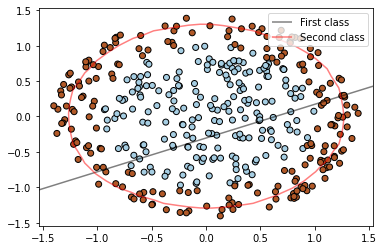

In [22]:
plot_the_samples(X_full,y,model2)

### DataSet Iris

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [33]:
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
X = X[50:150]
y = iris.target
y = y[50:150]

In [25]:
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
X = X[ np.concatenate((np.arange(50) , np.arange(100,150)), axis=0 )]
y = iris.target
y = y[np.concatenate((np.arange(50) , np.arange(100,150)), axis=0 )]

In [28]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 2.0  # SVM regularization parameter
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='poly', degree=5, gamma='auto', C=10))

models = (clf.fit(X, y) for clf in models)
acc = [accuracy_score(y,clf.predict(X)) for clf in models]

In [29]:
print(acc)

[0.99, 1.0]


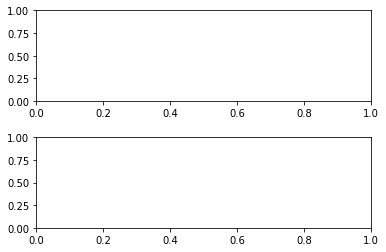

In [40]:
# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

### Multiclass classification

In [35]:
from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

iris = datasets.load_iris()
X = iris.data
y = iris.target

In [36]:
clf = svm.SVC(kernel = 'linear')

In [37]:
clf.fit(X,y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [38]:
y_pred = clf.predict(X)

Confusion matrix, without normalization
[[50  0  0]
 [ 0 49  1]
 [ 0  0 50]]
Normalized confusion matrix
[[1.   0.   0.  ]
 [0.   0.98 0.02]
 [0.   0.   1.  ]]


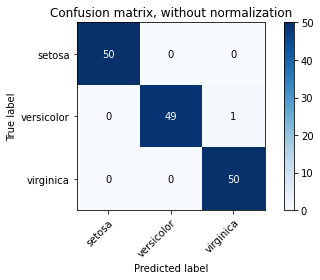

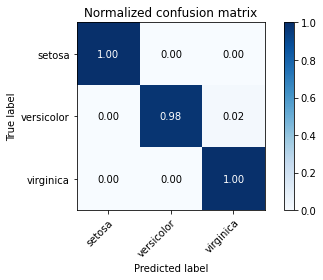

In [39]:
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y, y_pred, classes=iris.target_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y, y_pred, classes=iris.target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()